In [1]:
import geopandas as gp

In [2]:
seoul = gp.GeoDataFrame.from_file('seoul1\seoul1.shp')

In [3]:
import glob
import pandas as pd
path = r"1\20180423"
allFiles = glob.glob(path+"\*.DAT")
list=[]
for filename in allFiles:
    df = pd.read_csv(filename, header = None)
    list.append(df)
a = pd.concat(list)

In [4]:
a = a.iloc[:,[0,1,2,4,8]]

In [5]:
a = a.rename(columns = {0:'id', 1:'longtitude', 2:'latitude', 4:'timestamp', 8:'assigned'})

In [8]:
a = a.sort_values(['id', 'timestamp']).reset_index(drop=True)
a2 = pd.DataFrame(a.shift(periods=-1, axis=0))
a3 = a.merge(a2, left_index=True, right_index=True, suffixes=('_prev', '_curr'))

In [9]:
a5 = a3[(a3['assigned_prev'] == 0) & (a3['assigned_curr'] == 1)]

In [10]:
a6 = a5[(a5['id_prev'] == a5['id_curr'])]

In [11]:
b = a6.loc[:,['longtitude_prev','latitude_prev','longtitude_curr','latitude_curr']]

In [12]:
b['latitude_curr'] = b['latitude_curr']/10000000
b['longtitude_curr'] = b['longtitude_curr']/10000000
b['latitude_prev'] = b['latitude_prev']/10000000
b['longtitude_prev'] = b['longtitude_prev']/10000000
b = b[(b['latitude_prev']>30) & (b['longtitude_prev']>120)]
b = b[(b['latitude_curr']>30) & (b['longtitude_curr']>120)]

In [28]:
len(b)

47444

In [26]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [24]:
def plot_map(seoul,title, x_lim = None,y_lim = None,figsize = (15,10)):
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for i in range(25):
        x = seoul.iloc[i,7]
        y = seoul.iloc[i,8]
        ax.plot(x, y)
        x0 = np.mean(x)
        y0 = np.mean(y)
        plt.text(x0, y0, seoul.iloc[i,9], fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [16]:
%matplotlib inline

In [17]:
shp_path = 'seoul1\seoul1.shp'
sf = shp.Reader(shp_path)

In [18]:
list=[]
for shape in sf.shapes():
    x = [i[0] for i in shape.points]
    y = [i[1] for i in shape.points]
    list.append([x,y])

In [19]:
df1 = pd.DataFrame(list)

In [22]:
seoul['count1']=0

In [23]:
seoul.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,x,y,count1
0,11320,µµºÀ±¸,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699...","[127.019851357, 127.02217147700003, 127.023411...","[37.700884901999984, 37.69960736799999, 37.699...",0
1,11380,ÀºÆò±¸,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654...","[126.95173726300004, 126.95187890199998, 126.9...","[37.654891147, 37.654866395, 37.65491785500001...",0
2,11230,µ¿´ë¹®±¸,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606...","[127.07109525999999, 127.071188119, 127.071232...","[37.60732730400002, 37.60669169900001, 37.6064...",0
3,11590,µ¿ÀÛ±¸,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515...","[126.954724306, 126.95556088000001, 126.955566...","[37.51603819799999, 37.51571684800001, 37.5157...",0
4,11545,±ÝÃµ±¸,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485...","[126.879936983, 126.88033577600004, 126.880610...","[37.486062359000016, 37.48592397499999, 37.485...",0


C:\Users\Wintech\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Wintech\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x720 with 0 Axes>

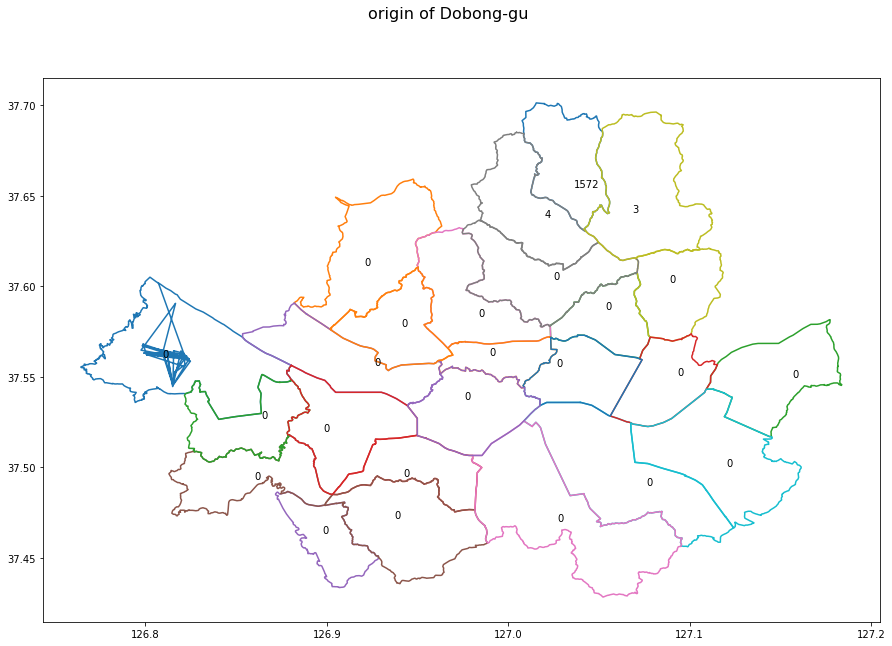

<Figure size 1080x720 with 0 Axes>

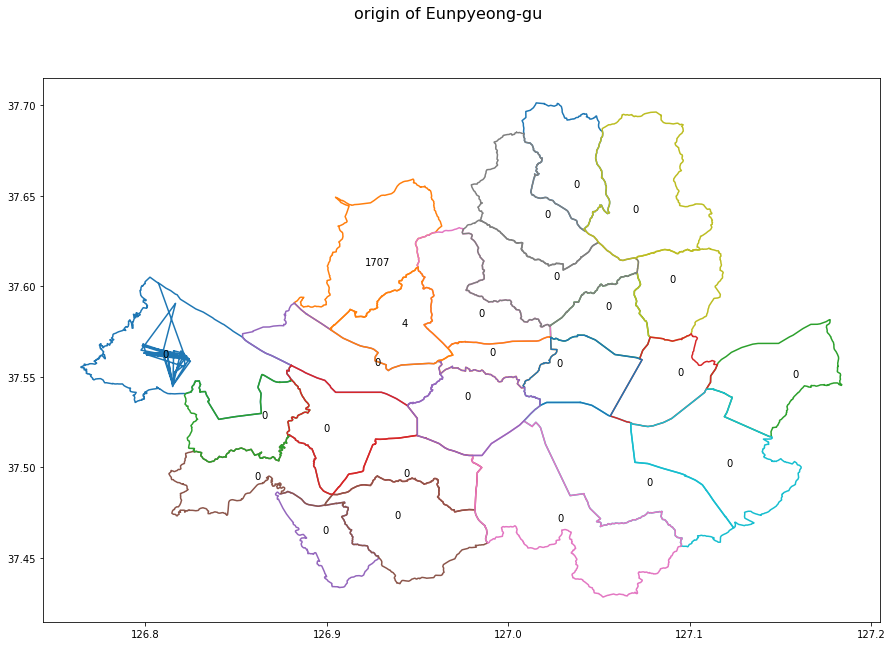

<Figure size 1080x720 with 0 Axes>

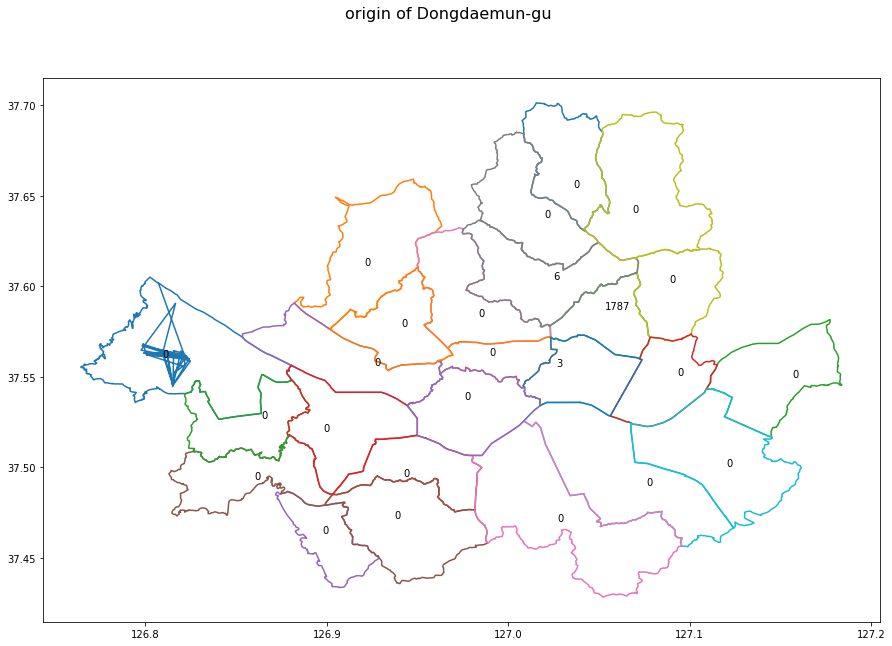

<Figure size 1080x720 with 0 Axes>

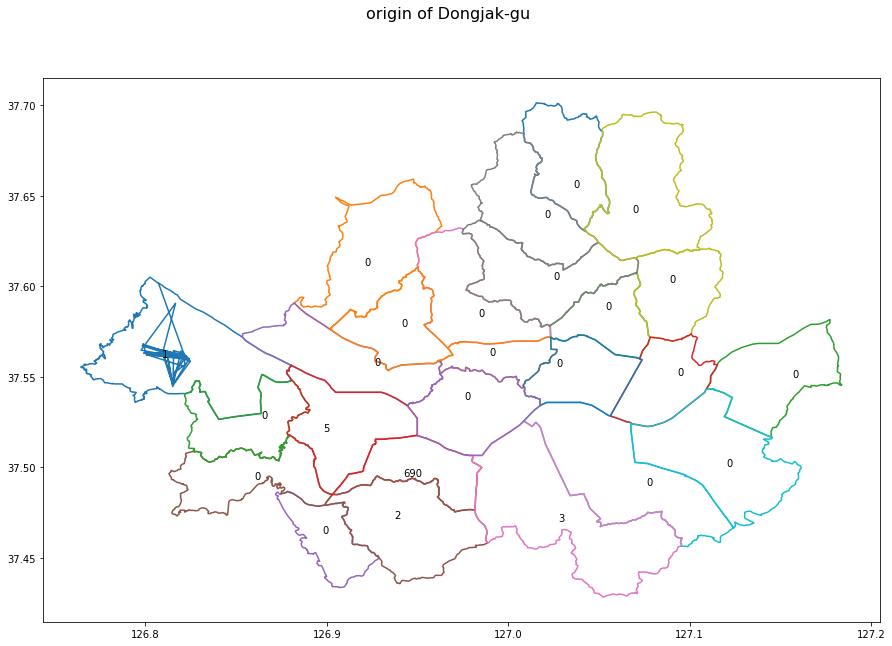

<Figure size 1080x720 with 0 Axes>

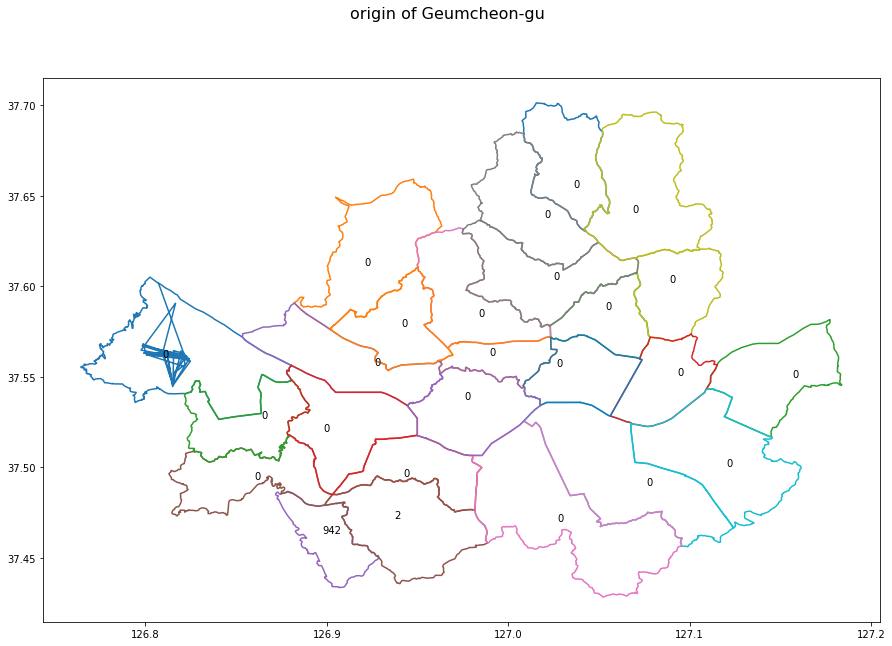

<Figure size 1080x720 with 0 Axes>

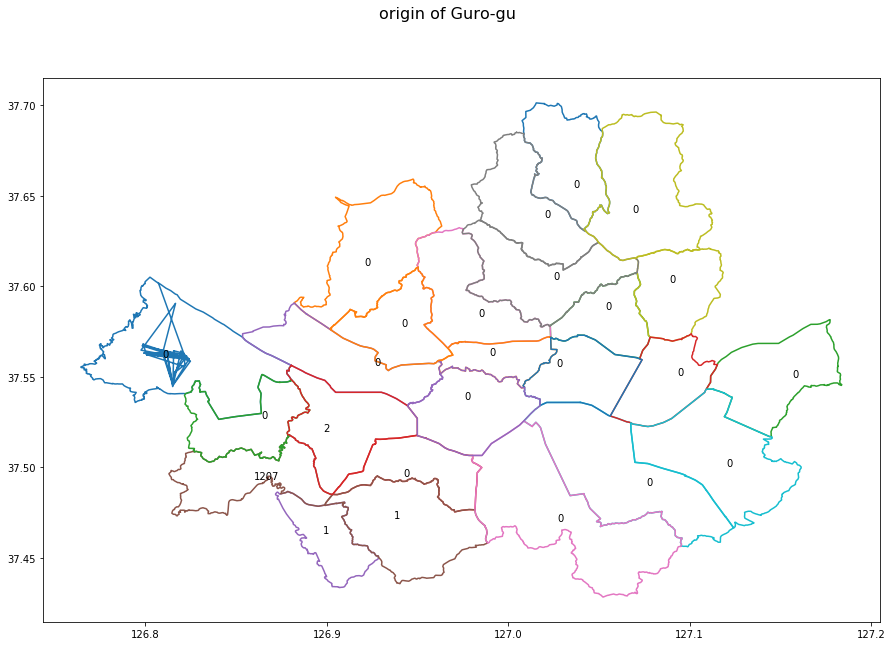

<Figure size 1080x720 with 0 Axes>

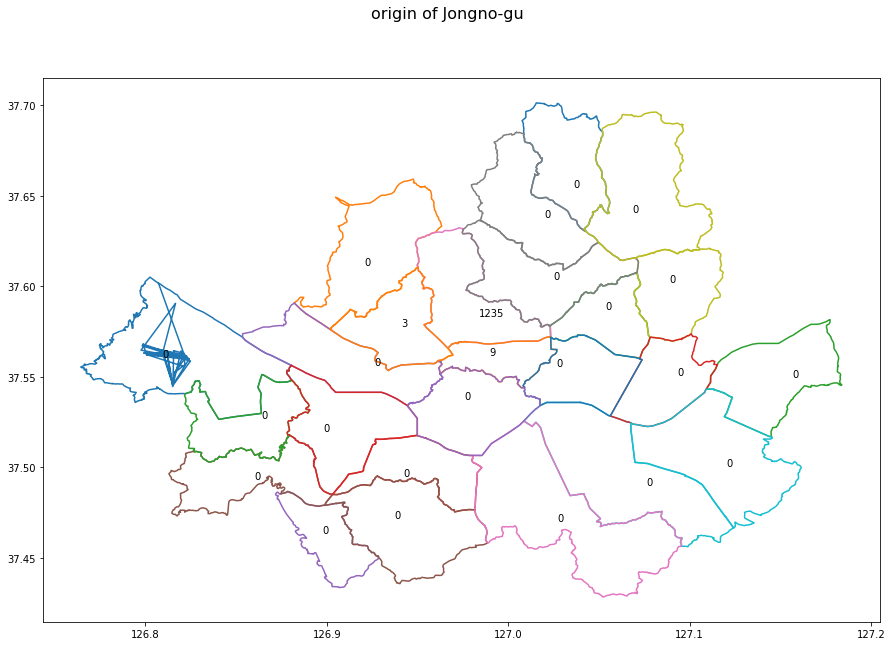

<Figure size 1080x720 with 0 Axes>

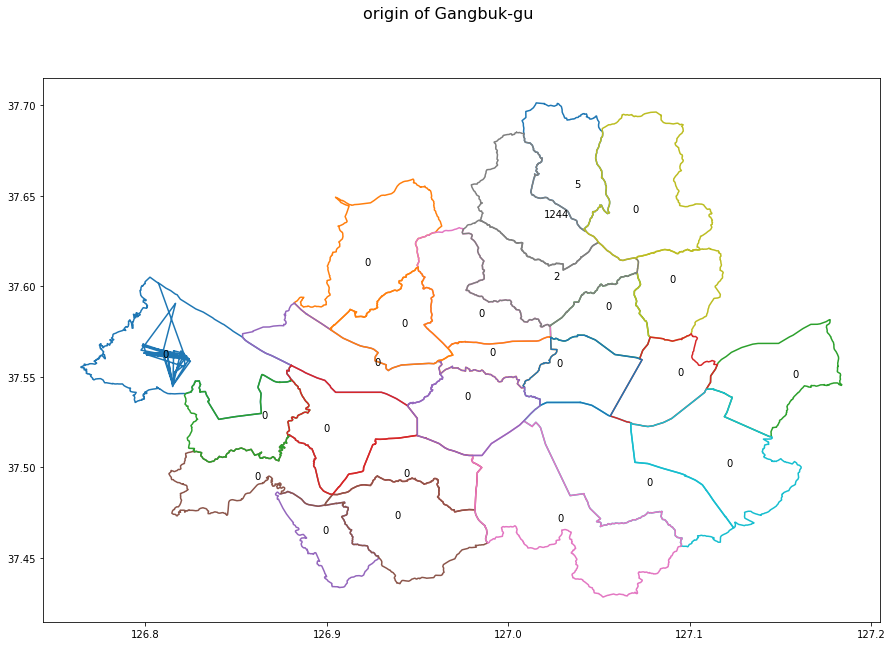

<Figure size 1080x720 with 0 Axes>

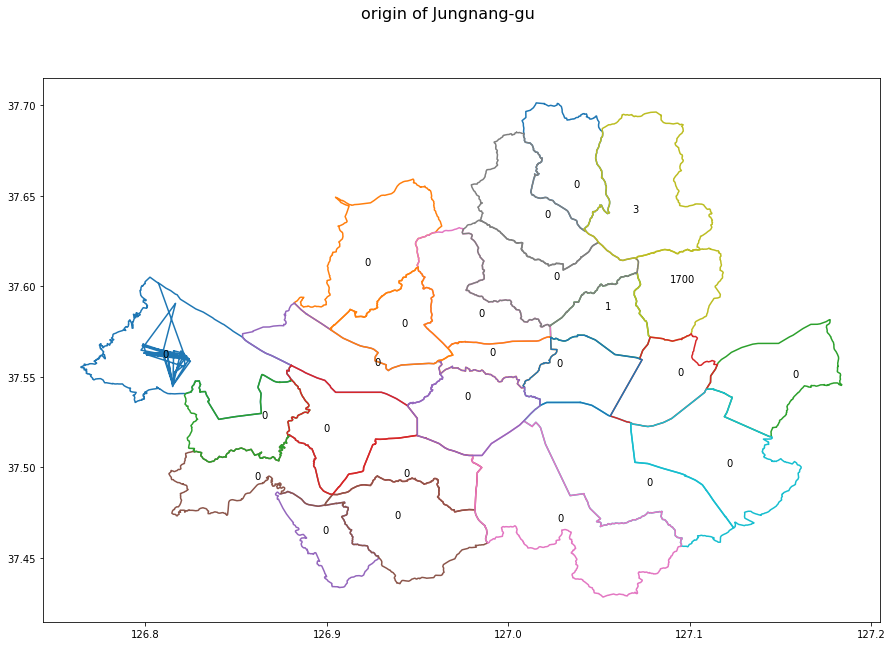

<Figure size 1080x720 with 0 Axes>

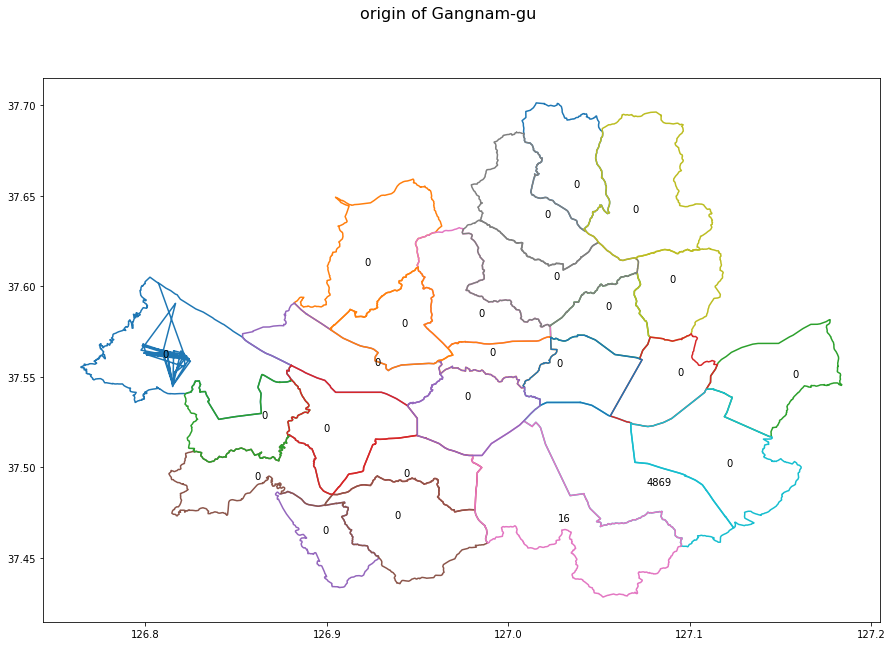

<Figure size 1080x720 with 0 Axes>

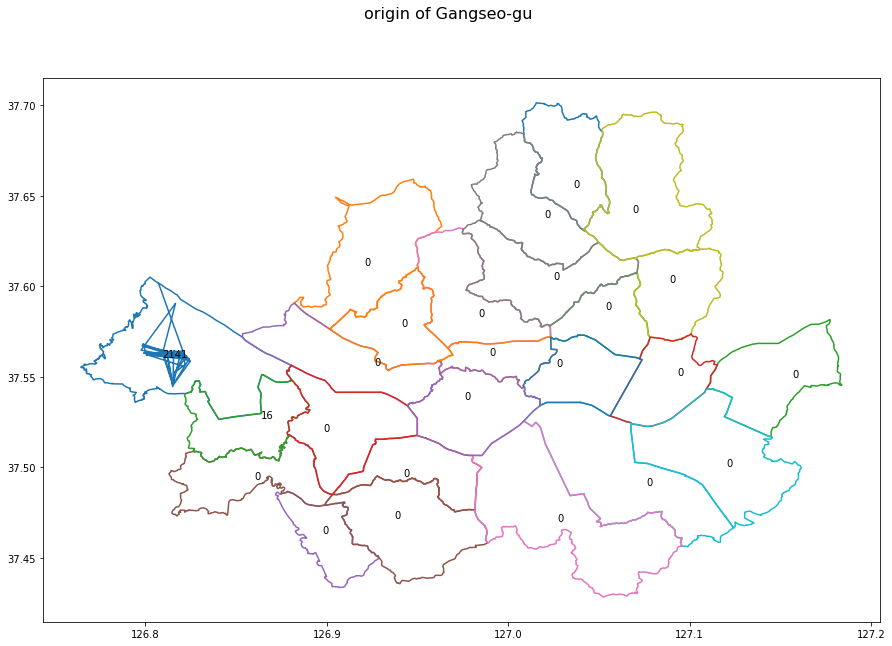

<Figure size 1080x720 with 0 Axes>

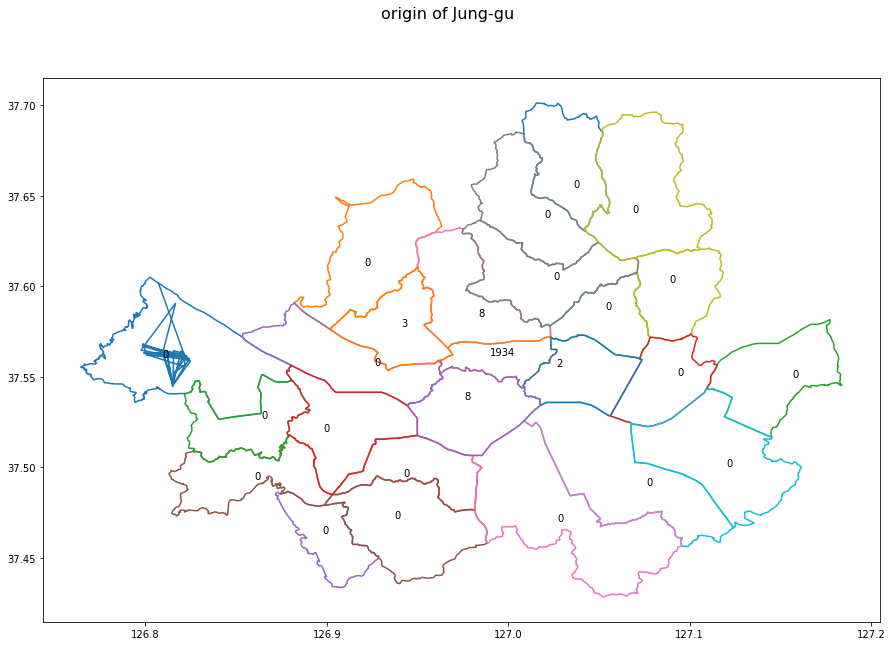

<Figure size 1080x720 with 0 Axes>

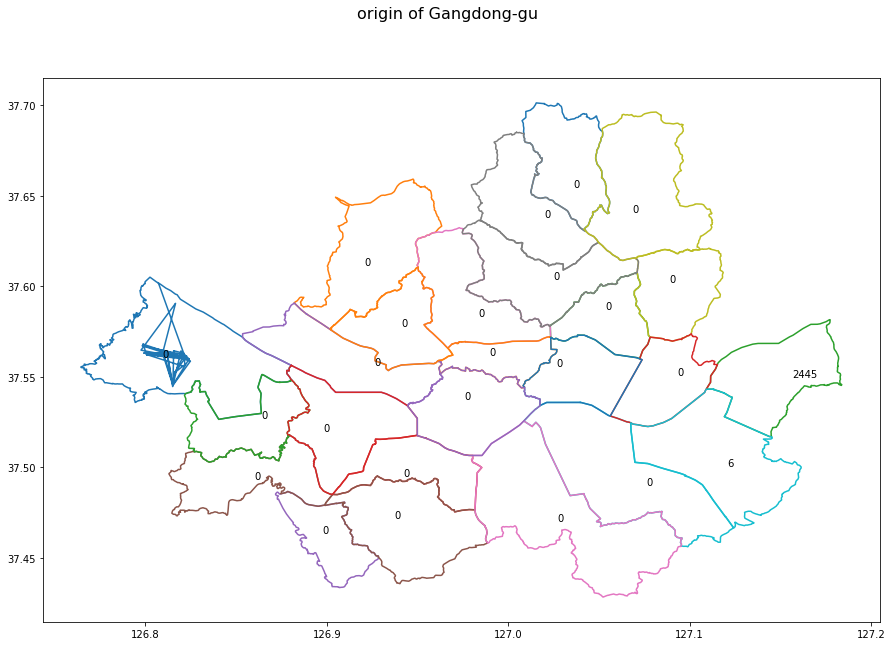

<Figure size 1080x720 with 0 Axes>

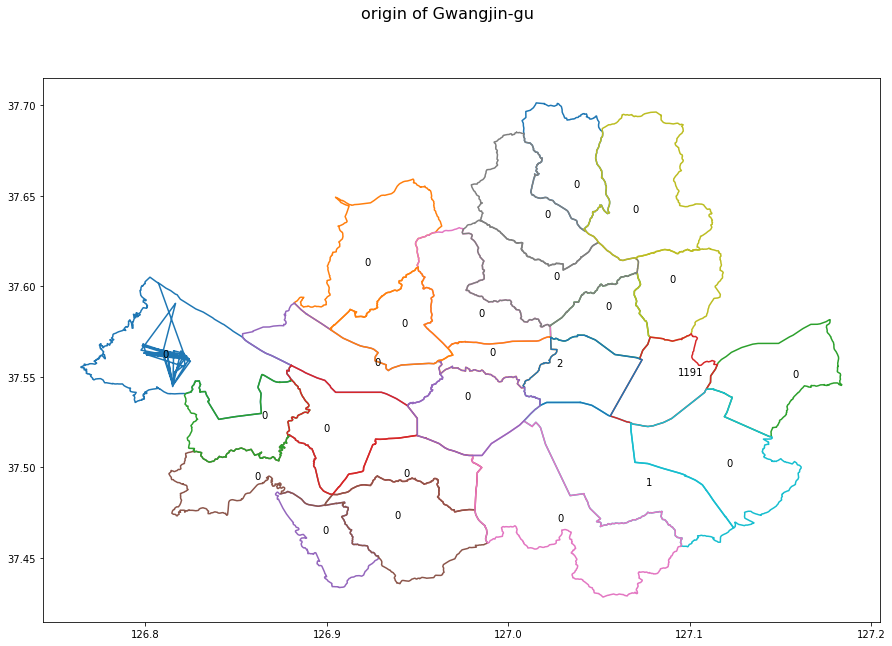

<Figure size 1080x720 with 0 Axes>

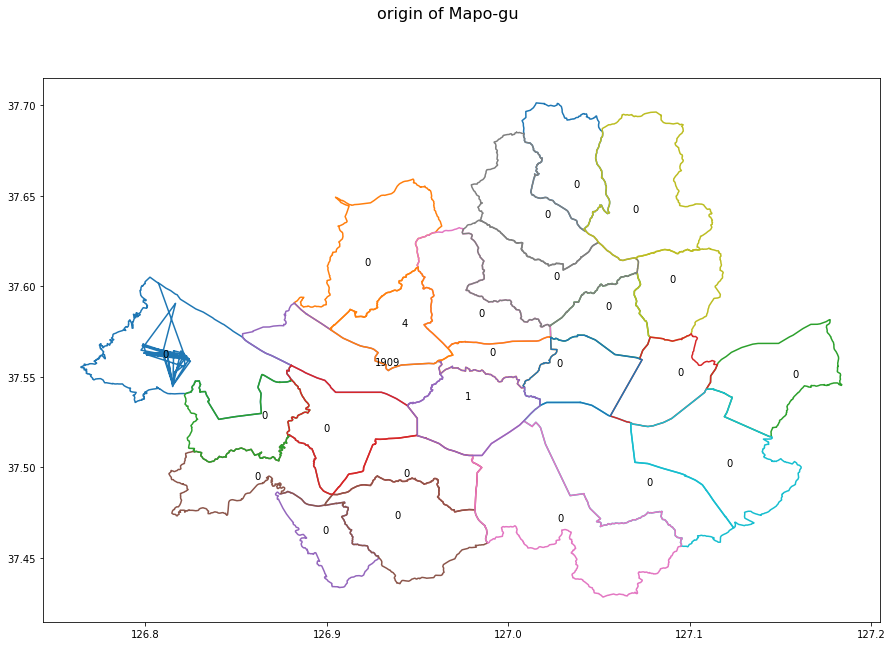

<Figure size 1080x720 with 0 Axes>

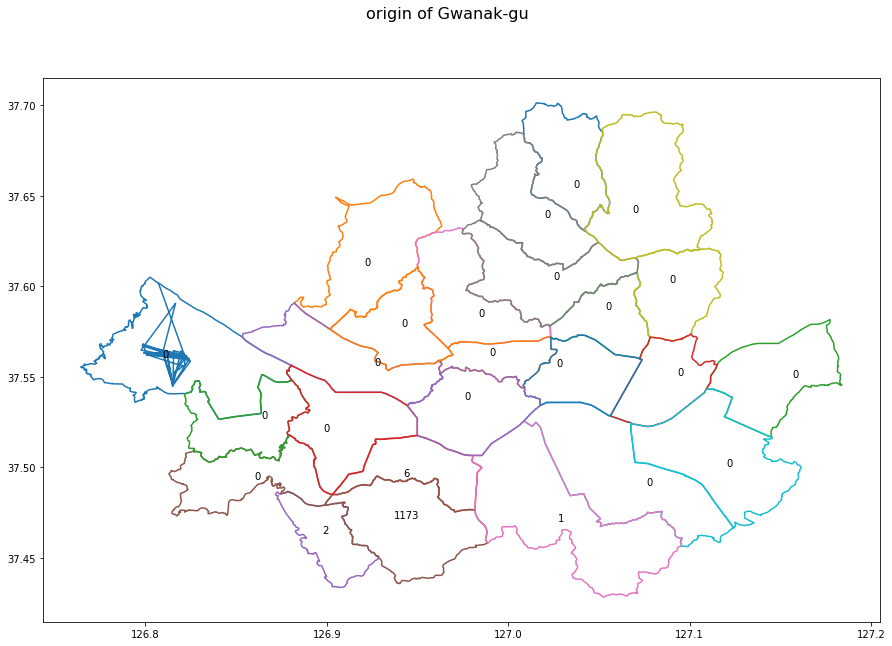

<Figure size 1080x720 with 0 Axes>

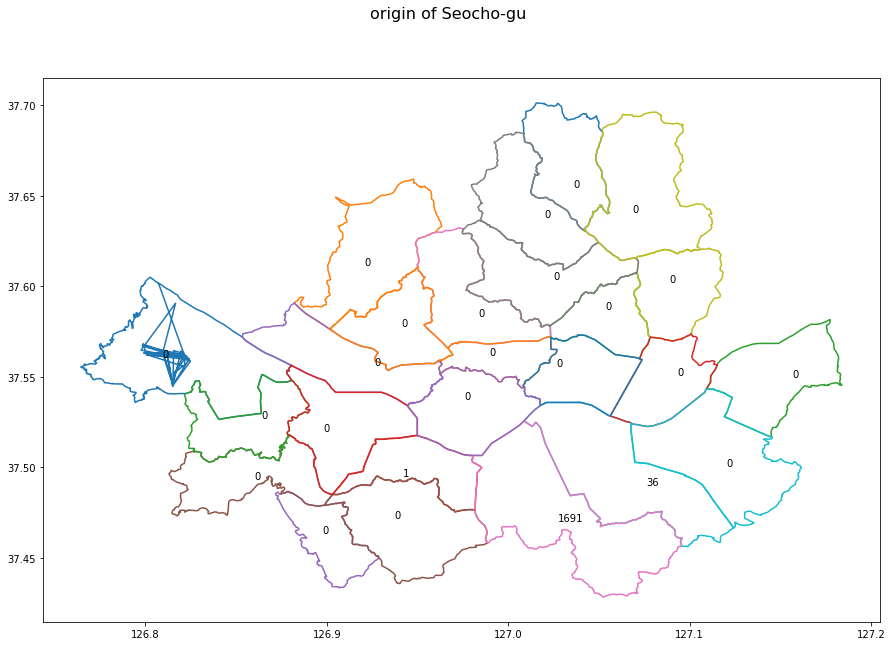

<Figure size 1080x720 with 0 Axes>

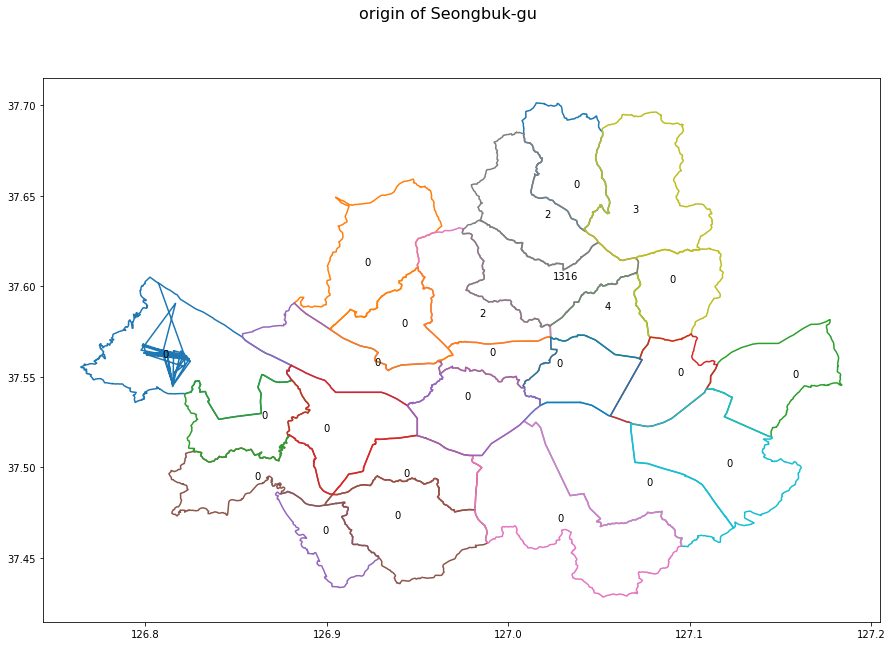

<Figure size 1080x720 with 0 Axes>

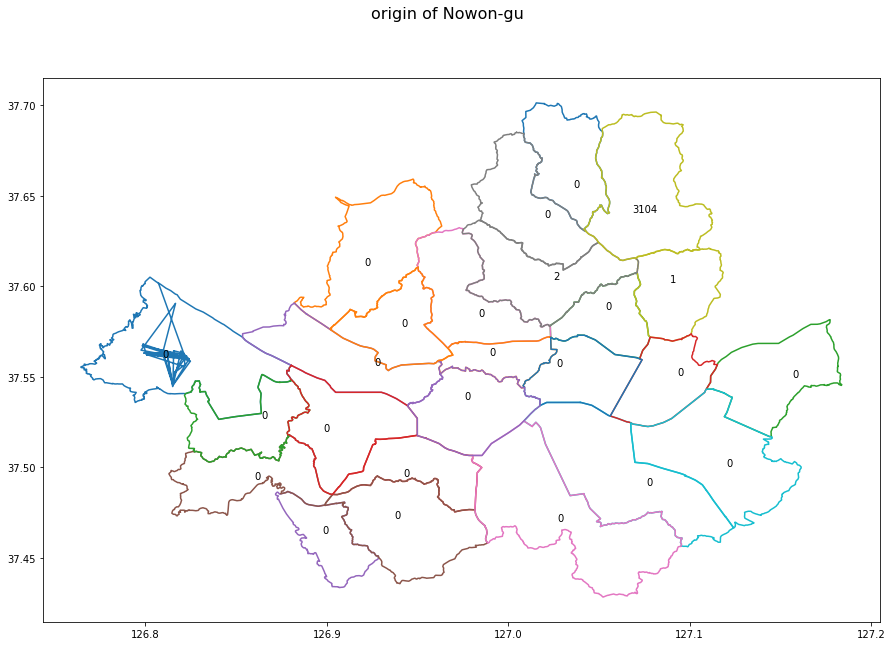

<Figure size 1080x720 with 0 Axes>

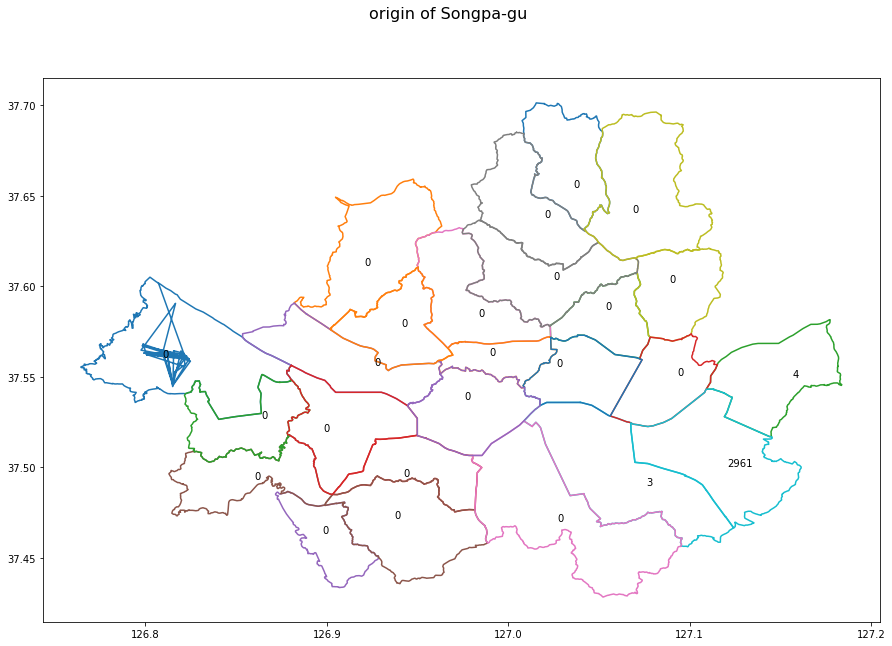

<Figure size 1080x720 with 0 Axes>

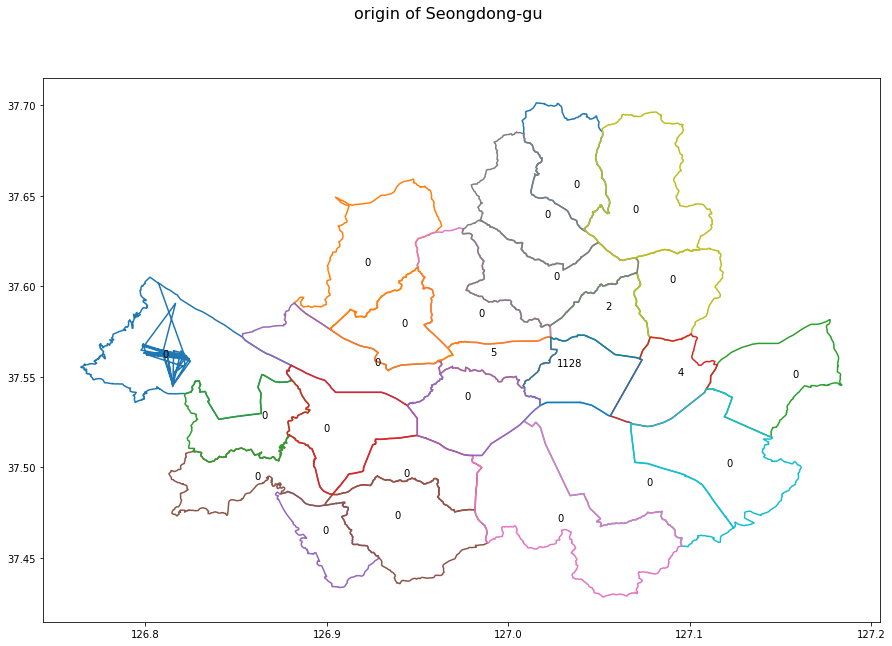

<Figure size 1080x720 with 0 Axes>

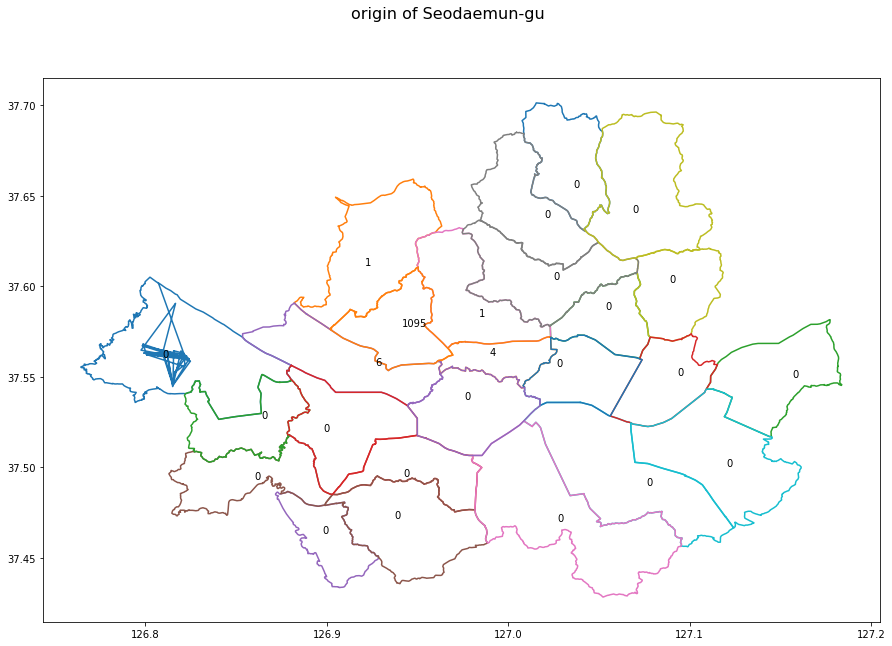

<Figure size 1080x720 with 0 Axes>

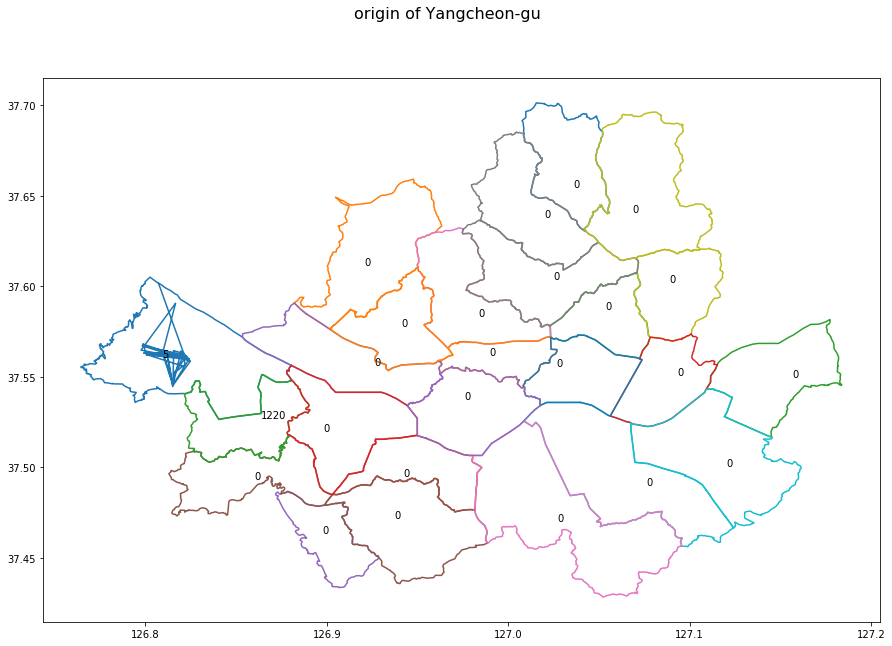

<Figure size 1080x720 with 0 Axes>

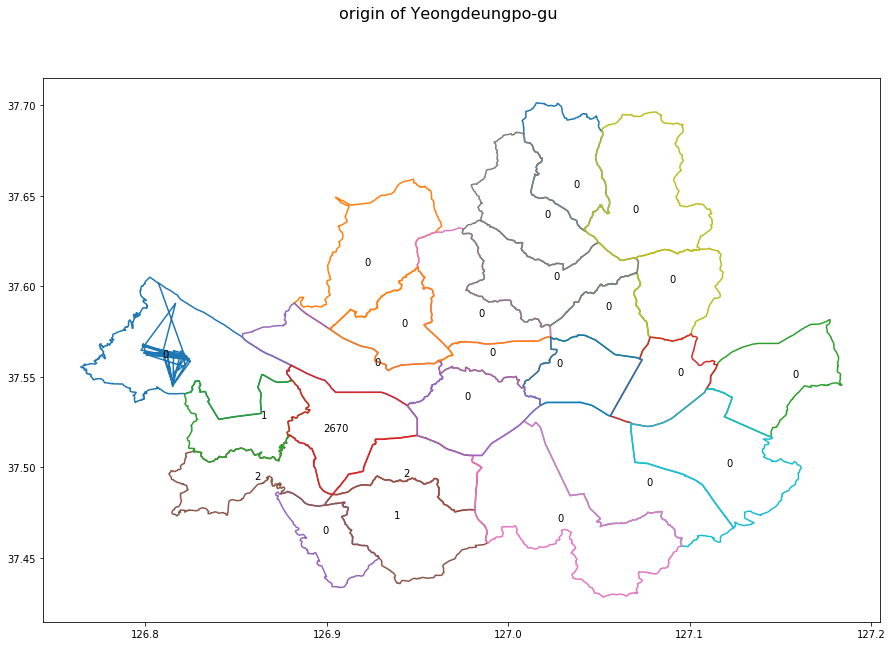

<Figure size 1080x720 with 0 Axes>

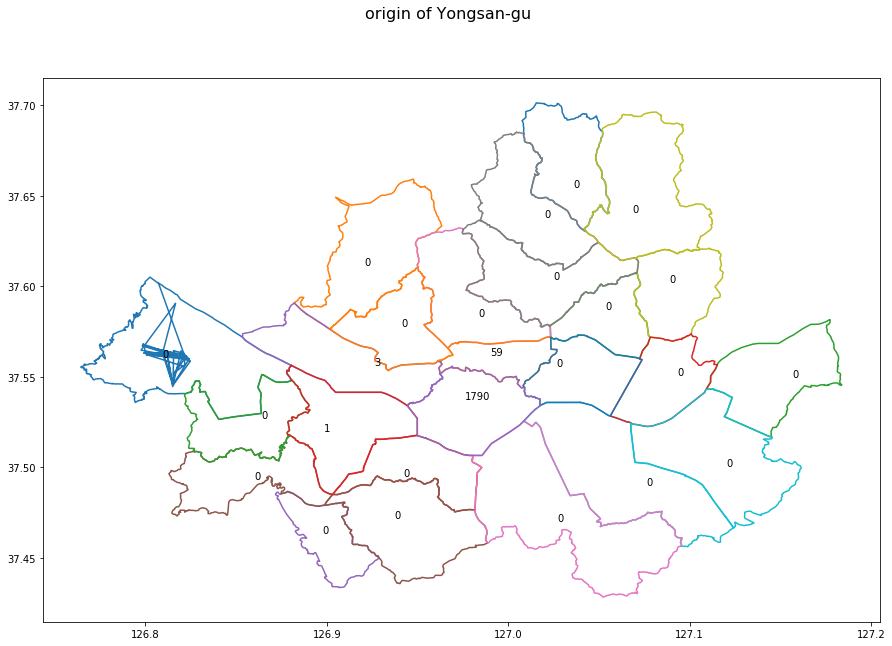

In [29]:
for k in range(25):
    seoul['count1']=0
    list=[]
    for i in range(47444):
        point = Point([b.iloc[i,2],b.iloc[i,3]])
        if seoul.iloc[k,6].contains(point):
            list.append([b.iloc[i,0],b.iloc[i,1]])
    c=pd.DataFrame(list)
    for i in range(len(c)):
        point = Point([c.iloc[i,0],c.iloc[i,1]])
        for j in range(25):
            if seoul.iloc[j,6].contains(point):
                seoul.iloc[j,9]+=1
    title = 'origin of '+seoul.iloc[k,2]
    plot_map(seoul,title, x_lim = None,y_lim = None,figsize = (15,10))